In [1]:
# Cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
sns.set_style('whitegrid')
%matplotlib inline

df = pd.read_csv('housing.csv')   # change filename if necessary
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Cell 2
print("Shape:", df.shape)
display(df.info())
display(df.describe().T)
display(df.isnull().sum().sort_values(ascending=False).head(20))


Shape: (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [3]:
# Cell 3
# Basic cleaning: drop rows with many missing values or fill a few
# Adjust according to dataset columns
df = df.dropna()   # simple and safe for a small demo; replace by imputation if needed
df.reset_index(drop=True, inplace=True)
df.shape


(545, 13)

In [6]:
list(df.columns)


['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [7]:
# Cell 4 — DEFINING FEATURES AND TARGET (Correct for your dataset)

# Target variable
target = 'price'

# ---------- SIMPLE LINEAR REGRESSION ----------
# We choose 'area' because it is a numeric column and strongly related to price
features = ['area']

# X for simple LR
X_simple = df[features].values.reshape(-1, 1)

# y remains the target
y = df[target].values


# ---------- MULTIPLE LINEAR REGRESSION ----------
# Numeric features
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Categorical features that need one-hot encoding
categorical_features = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea',
    'furnishingstatus'
]

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Build final feature list for multiple regression
multi_features = numeric_features + [col for col in df_encoded.columns 
                                     if any(cat in col for cat in categorical_features)]

# X for multiple LR
X_multi = df_encoded[multi_features].values

# Target (same)
y = df_encoded[target].values

df_encoded.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [9]:
# Cell 5
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)


In [11]:
# Cell 6 — SCALING for MULTIPLE LINEAR REGRESSION (Correct for your dataset)

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit scaler ONLY on the multiple regression training features
# (We will split in the next cell, but if already split, use training only)

# If you haven't split yet, do it now:
from sklearn.model_selection import train_test_split

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

# Scale only MULTIPLE regression features
X_train_m_scaled = scaler.fit_transform(X_train_m)
X_test_m_scaled = scaler.transform(X_test_m)

print("Scaling completed! Shape of scaled X_train_m:", X_train_m_scaled.shape)


Scaling completed! Shape of scaled X_train_m: (436, 13)


In [12]:
# Cell 7
lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)

y_pred_s = lr_simple.predict(X_test_s)

mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
r2_s  = r2_score(y_test_s, y_pred_s)

print("Simple LR - MAE:", mae_s)
print("Simple LR - MSE:", mse_s)
print("Simple LR - R2:", r2_s)

# Coefficient and intercept
print("Coefficient:", lr_simple.coef_)
print("Intercept:", lr_simple.intercept_)


Simple LR - MAE: 1474748.1337969352
Simple LR - MSE: 3675286604768.185
Simple LR - R2: 0.27287851871974644
Coefficient: [425.72984194]
Intercept: 2512254.263959344


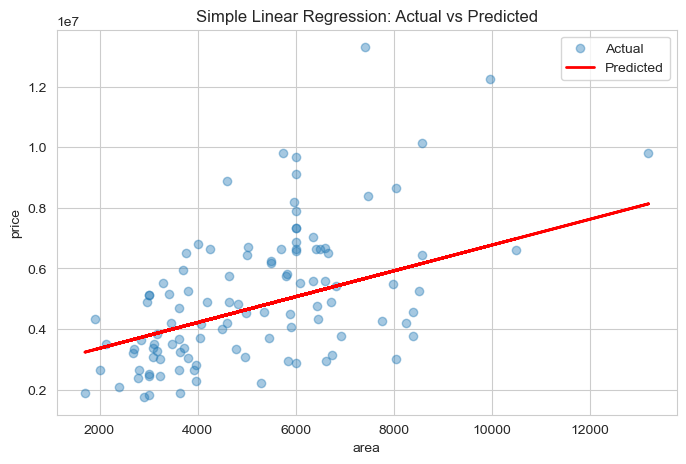

In [13]:
# Cell 8
plt.figure(figsize=(8,5))
plt.scatter(X_test_s, y_test_s, alpha=0.4, label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Predicted')
plt.xlabel(features[0])
plt.ylabel(target)
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.legend()
plt.savefig('plots/simple_regression.png', dpi=150, bbox_inches='tight')
plt.show()


In [14]:
# Cell 9
lr_multi = LinearRegression()
lr_multi.fit(X_train_m_scaled, y_train_m)

y_pred_m = lr_multi.predict(X_test_m_scaled)

mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m  = r2_score(y_test_m, y_pred_m)

print("Multi LR - MAE:", mae_m)
print("Multi LR - MSE:", mse_m)
print("Multi LR - R2:", r2_m)

# Coefficients (map to features)
for feat, coef in zip(multi_features, lr_multi.coef_):
    print(f"{feat}: {coef:.4f}")
print("Intercept:", lr_multi.intercept_)


Multi LR - MAE: 970043.4039201642
Multi LR - MSE: 1754318687330.668
Multi LR - R2: 0.6529242642153176
area: 519552.4163
bedrooms: 57349.5594
bathrooms: 521879.0277
stories: 349251.4389
parking: 192005.9537
mainroad_yes: 128498.6282
guestroom_yes: 88768.6677
basement_yes: 187067.8032
hotwaterheating_yes: 149862.7030
airconditioning_yes: 365157.3939
prefarea_yes: 266656.3520
furnishingstatus_semi-furnished: -62837.3219
furnishingstatus_unfurnished: -192015.9180
Intercept: 4706527.385321101


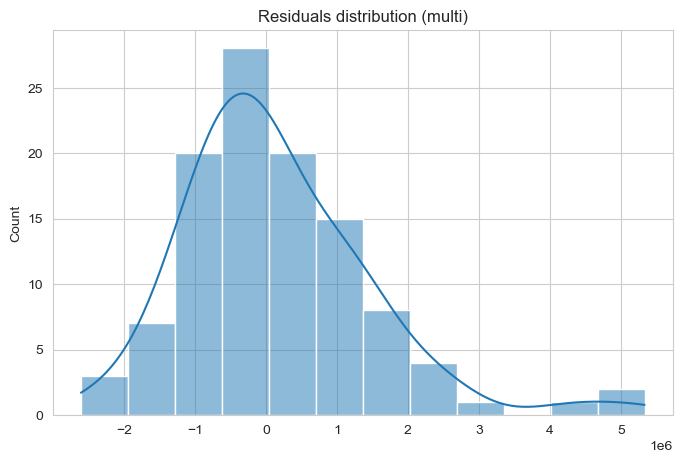

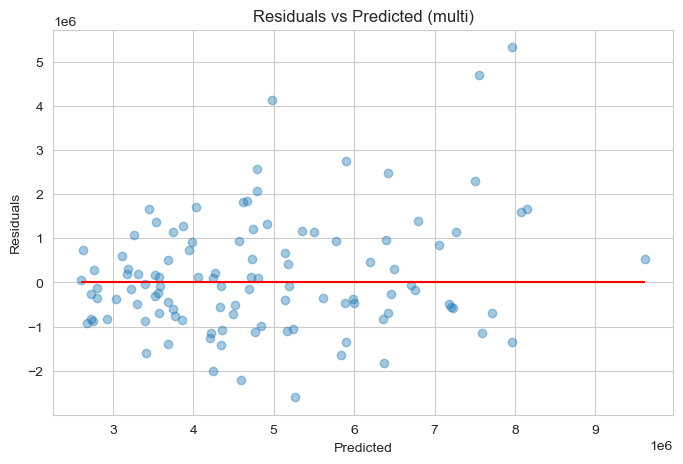

In [15]:
# Cell 10
residuals = y_test_m - y_pred_m
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals distribution (multi)')
plt.savefig('plots/residuals_multi.png', dpi=150, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(y_pred_m, residuals, alpha=0.4)
plt.hlines(0, xmin=y_pred_m.min(), xmax=y_pred_m.max(), colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (multi)')
plt.savefig('plots/residuals_vs_predicted.png', dpi=150, bbox_inches='tight')
plt.show()


In [17]:
import os
os.makedirs("models", exist_ok=True)




In [ ]:
import joblib

joblib.dump(lr_simple, 'models/lr_simple_task3.pkl')
joblib.dump(lr_multi, 'models/lr_multi_task3.pkl')

print("Models saved successfully!")
